# M2.5: Convolutional Neural Networks

Andrea Corona Arroyo
A01366768

In [ ]:
!pip install tensorflow matplotlib

In [1]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset

In [2]:
# Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# image dimensions (assumed square)
image_size = x_train.shape[1]

# Normalize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255     

# Experiment 1: Baseline Model

The baseline model will be composed of:

- Convolutional layer with 32 filters, 3×3 kernel size, and ReLU activation.
- MaxPooling layer with 2×2 pool size.
- Flatten layer.
- Dense layer with 128 units and ReLU activation.
- Dense output layer with softmax activation.

In [ ]:
# Create Model
model = tf.keras.Sequential()

# Adding Convolutional layer with 32 filters, 3×3 kernel size, and ReLU activation
model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)))

# Adding MaxPooling layer with 2×2 pool size
model.add(MaxPooling2D(pool_size = (2, 2)))

# Adding Flatten layer
model.add(Flatten())

# Adding Dense layer with 128 units and ReLU activation
model.add(Dense(128, activation = 'relu'))

# Adding Dense output layer with softmax activation
model.add(Dense(num_labels, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 128)               921728    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 923914 (3.52 MB)
Trainable params: 923914 (3.52 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [ ]:
# Compile
model.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [ ]:
# Train
history = model.fit(
    x_train, y_train, batch_size=128, epochs=20,
    verbose=1)

Epoch 1/20
391/391 [==============================] - 6s 5ms/step - loss: 1.4790 - accuracy: 0.4733
Epoch 2/20
391/391 [==============================] - 2s 5ms/step - loss: 1.1943 - accuracy: 0.5832
Epoch 3/20
391/391 [==============================] - 2s 6ms/step - loss: 1.0742 - accuracy: 0.6235
Epoch 4/20
391/391 [==============================] - 2s 4ms/step - loss: 0.9852 - accuracy: 0.6557
Epoch 5/20
391/391 [==============================] - 2s 4ms/step - loss: 0.9217 - accuracy: 0.6811
Epoch 6/20
391/391 [==============================] - 2s 5ms/step - loss: 0.8651 - accuracy: 0.6995
Epoch 7/20
391/391 [==============================] - 2s 4ms/step - loss: 0.8069 - accuracy: 0.7206
Epoch 8/20
391/391 [==============================] - 2s 5ms/step - loss: 0.7541 - accuracy: 0.7385
Epoch 9/20
391/391 [==============================] - 2s 5ms/step - loss: 0.7075 - accuracy: 0.7537
Epoch 10/20
391/391 [==============================] - 2s 5ms/step - loss: 0.6597 - accuracy: 0.7712

In [ ]:
# validate the model on test dataset to determine generalization
score  = model.evaluate(x_test, y_test, batch_size=128, verbose=False)
print('Test loss:', score[0])
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))

Test loss: 1.3400378227233887

Test accuracy: 65.4%


# Experiment 2: Changing Architecture

The phase two model will be composed of:

- Convolutional layer with 32 filters, 3×3 kernel size, and ReLU activation.
- MaxPooling layer with 2×2 pool size.
- Convolutional layer with 64 filters, 3×3 kernel size, and ReLU activation.
- Dropout layer of 25%.
- MaxPooling layer with 2×2 pool size.
- Flatten layer.
- Dense layer with 128 units and ReLU activation.
- Dropout layer of 50%.
- Dense output layer with softmax activation.

In [ ]:
# Create Model
model = tf.keras.Sequential()

# Adding Convolutional layer with 32 filters, 3×3 kernel size, and ReLU activation
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))

# Adding MaxPooling layer with 2×2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding another Convolutional layer with 64 filters and 3×3 kernel size
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Adding Dropout layer to reduce overfitting
model.add(Dropout(0.25))

# Adding another MaxPooling layer with 2×2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding Flatten layer
model.add(Flatten())

# Adding Dense layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))

# Adding Dropout layer to further reduce overfitting
model.add(Dropout(0.5))

# Adding Dense output layer with softmax activation
model.add(Dense(num_labels, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2304)             

In [ ]:
# Compile
model.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [ ]:
# Train
history = model.fit(
    x_train, y_train, batch_size=128, epochs=20,
    verbose=1)

Epoch 1/20
391/391 [==============================] - 6s 7ms/step - loss: 1.6623 - accuracy: 0.3925
Epoch 2/20
391/391 [==============================] - 3s 7ms/step - loss: 1.3444 - accuracy: 0.5190
Epoch 3/20
391/391 [==============================] - 3s 7ms/step - loss: 1.2024 - accuracy: 0.5752
Epoch 4/20
391/391 [==============================] - 3s 7ms/step - loss: 1.1223 - accuracy: 0.6033
Epoch 5/20
391/391 [==============================] - 3s 9ms/step - loss: 1.0682 - accuracy: 0.6239
Epoch 6/20
391/391 [==============================] - 3s 6ms/step - loss: 1.0232 - accuracy: 0.6411
Epoch 7/20
391/391 [==============================] - 3s 7ms/step - loss: 0.9829 - accuracy: 0.6552
Epoch 8/20
391/391 [==============================] - 3s 7ms/step - loss: 0.9480 - accuracy: 0.6680
Epoch 9/20
391/391 [==============================] - 3s 7ms/step - loss: 0.9297 - accuracy: 0.6728
Epoch 10/20
391/391 [==============================] - 3s 8ms/step - loss: 0.8950 - accuracy: 0.6848

In [ ]:
# validate the model on test dataset to determine generalization
score  = model.evaluate(x_test, y_test, batch_size=128, verbose=False)
print('Test loss:', score[0])
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))

Test loss: 0.8076456785202026

Test accuracy: 72.2%


# Experiment 3: Hyperparameter Tuning

In this phase will be using the baseline model, but changing the learning rate, batch size and number of epochs.


In [5]:
# Define a function to create and compile the model with given learning rate
def create_model(learning_rate):
    model = tf.keras.Sequential()

    # Adding Convolutional layer with 32 filters, 3×3 kernel size, and ReLU activation
    model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)))

    # Adding MaxPooling layer with 2×2 pool size
    model.add(MaxPooling2D(pool_size = (2, 2)))

    # Adding Flatten layer
    model.add(Flatten())

    # Adding Dense layer with 128 units and ReLU activation
    model.add(Dense(128, activation = 'relu'))

    # Adding Dense output layer with softmax activation
    model.add(Dense(num_labels, activation = 'softmax'))

    # Set learning rate for optimizer
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    # Compile
    model.compile(optimizer=optimizer, loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])
    return model

# Define lists to store results
hyperparameter_results = []
test_accuracies = []
test_losses = []

# Define hyperparameters to test
learning_rates = [0.0008, 0.0005, 0.00003]
batch_sizes = [32, 64, 128]
num_epochs_list = [10, 30, 50]

# Loop through different hyperparameters
for learning_rate in learning_rates:
    for batch_size in batch_sizes:
        for num_epochs in num_epochs_list:

            print(f"Testing hyperparameters: Learning Rate={learning_rate}, Batch Size={batch_size}, Epochs={num_epochs}")
            model = create_model(learning_rate)

            # Train the model adding valitadion set
            history = model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_split=0.2, verbose=False)

            # Evaluate on test set
            test_loss, test_accuracy = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=False)
            print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

            # Store results
            hyperparameter_results.append((learning_rate, batch_size, num_epochs))
            test_accuracies.append(test_accuracy)
            test_losses.append(test_loss)


Testing hyperparameters: Learning Rate=0.0008, Batch Size=32, Epochs=10


c:\Users\coron\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Test Loss: 1.1268562078475952, Test Accuracy: 0.6456000208854675
Testing hyperparameters: Learning Rate=0.0008, Batch Size=32, Epochs=30
Test Loss: 2.367509603500366, Test Accuracy: 0.6086999773979187
Testing hyperparameters: Learning Rate=0.0008, Batch Size=32, Epochs=50
Test Loss: 3.979038715362549, Test Accuracy: 0.6147000193595886
Testing hyperparameters: Learning Rate=0.0008, Batch Size=64, Epochs=10
Test Loss: 1.0663105249404907, Test Accuracy: 0.6298999786376953
Testing hyperparameters: Learning Rate=0.0008, Batch Size=64, Epochs=30
Test Loss: 2.0689876079559326, Test Accuracy: 0.6169000267982483
Testing hyperparameters: Learning Rate=0.0008, Batch Size=64, Epochs=50
Test Loss: 2.9622983932495117, Test Accuracy: 0.6173999905586243
Testing hyperparameters: Learning Rate=0.0008, Batch Size=128, Epochs=10
Test Loss: 1.0868159532546997, Test Accuracy: 0.626800000667572
Testing hyperparameters: Learning Rate=0.0008, Batch Size=128, Epochs=30
Test Loss: 1.21006178855896, Test Accuracy

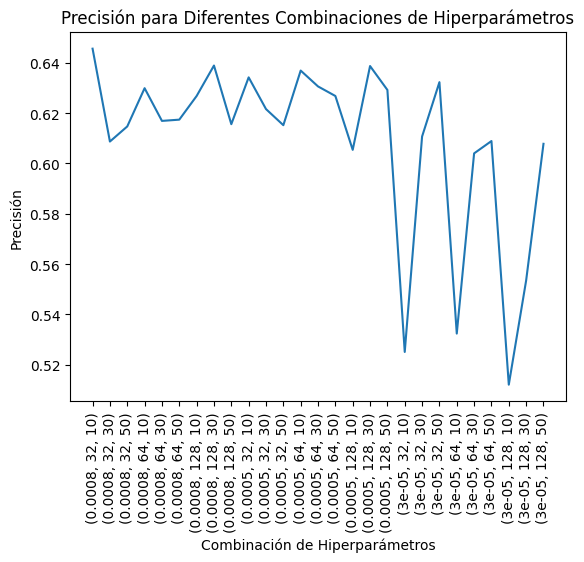

In [13]:
# Plot results
plt.plot(test_accuracies)
plt.xlabel('Combinación de Hiperparámetros')
plt.ylabel('Precisión')
plt.title('Precisión para Diferentes Combinaciones de Hiperparámetros')
plt.xticks(range(len(hyperparameter_results)), hyperparameter_results, rotation=90)
plt.show()

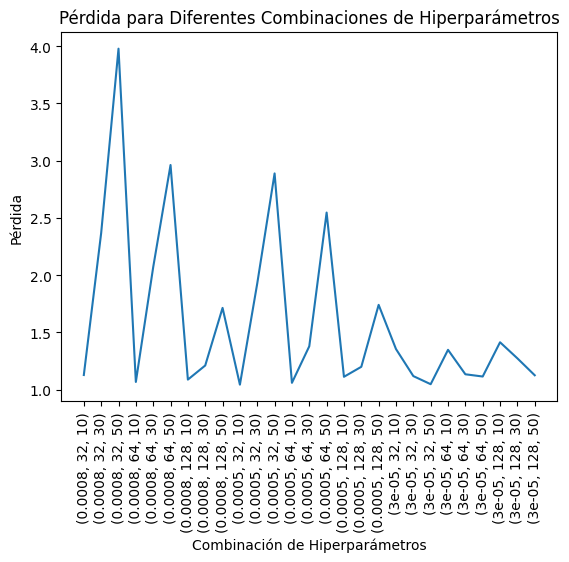

In [14]:
# Plot results
plt.plot(test_losses)
plt.xlabel('Combinación de Hiperparámetros')
plt.ylabel('Pérdida')
plt.title('Pérdida para Diferentes Combinaciones de Hiperparámetros')
plt.xticks(range(len(hyperparameter_results)), hyperparameter_results, rotation=90)
plt.show()

In [15]:
# Assuming test_accuracies and test_losses are lists containing accuracy and loss values respectively

# Index of max accuracy
max_accuracy_index = test_accuracies.index(max(test_accuracies))

# Index of min accuracy
min_accuracy_index = test_accuracies.index(min(test_accuracies))

# Index of max loss
max_loss_index = test_losses.index(max(test_losses))

# Index of min loss
min_loss_index = test_losses.index(min(test_losses))

                             
# Printing combination with highest and lower accuracy and loss
print(f" Max accuracy obtained: {max(test_accuracies)}, with combination {hyperparameter_results[max_accuracy_index]}")
print(f" Min accuracy obtained: {min(test_accuracies)}, with combination {hyperparameter_results[min_accuracy_index]}")

print(f" Max loss obtained: {max(test_losses)}, with combination {hyperparameter_results[max_loss_index]}")
print(f" Min loss obtained: {min(test_losses)}, with combination {hyperparameter_results[min_loss_index]}")



 Max accuracy obtained: 0.6456000208854675, with combination (0.0008, 32, 10)
 Min accuracy obtained: 0.5120999813079834, with combination (3e-05, 128, 10)
 Max loss obtained: 3.979038715362549, with combination (0.0008, 32, 50)
 Min loss obtained: 1.0424678325653076, with combination (0.0005, 32, 10)
